# COVID CASE STATISTICS ALL OVER THE WORLD

# Graph Descriptions:

Team Members: Bhavya Kosaraju, Rishitha Nuka, Aditya Misra



For the Interactive visualization, we created a graph to see the comparison between the number of new cases vs number of new deaths over a period of time. Through the graph we can infer that the no of cases has been increasing exponentially while there has hardly been any changes in the no of deaths. Also, when we compare the both, no of deaths is almost negligible against the no of cases. This implies that either the COVID variant isn't as strong/deadly or with time there is mass immunity amongst people that might be due to vaccinations.

In the 2nd interactive graph, we  have a TreeMap representation of different Countries with respective to their active cases, Bangladesh ranks first, standing at 97,577 cases followed by Argentina at 91,782 cases. This graph helps us identify the most covid risk-prone countries. The hover interactivty helps us see how active cases affect each country. This is one of the most visually appealing graph as it uses a very good color scheme. 

In the 3rd contextual graph, we have a horizontal bar chart showing the cases, filtered by year in the date column, for each WHO region that gives us a clear idea of which regions were highly affected by covid 19. It is clear from the graph that the highest is in Europe followed by Africa and so on. All these graphs help us understand the COVID scenario in different countries and regions.

The 4th contextual graph shows the number of recovered cases from 2020-01-22 to 2020-07-27. It is very clear from the graph that the number of recovered cases are increasing exponentially. This can be a result of the covid19 variant not being very strong or everyones immunity to covid 19 increased due to the vaccination. We also included the new recovered cases in this graph which also increased with time so we can conclude that the recovery rate of covid 19 increased in this period.

The 5th contextual bar chart shows the comparison between recovered and active covid 19 cases in different countries. We can see that the number of recovered cases are more than the number of active cases in most of the countries except for US, France and Bangladesh. This could be because most of the population in Us, France and Bangladesh might not be have compulsory vaccinations for their citizens.


I (Team member Nuka Rishitha) was able to learn more about interactive graphs and plots in plotly. Our team attempted to generate a heatmap using bqplot but quickly realized that our dataset was not feasible for it. I worked on interactive bheat map and also on the contexual visualizations. Bhavya looked into diverse matplotlib plots for the contextual visualizations and was able to generate a few that give more insight into the dataset for the viewer. We collaborated as team and Aditya Misra a team member, taught me more about hover interactivity.

In group work plan submitted in Part 2, we added a covid 19 vaccination vs mortality dataset which we wanted to use to see the rate of vaccinations in a sample population, and the dates various countries  got vaccinated but we were unable to use that data set as it was inconsistent, and didn't have too many values due to which were were facing difficulty in visualizing it so we decided to use the previous dataset only to give some in depth analysis about Covid 19. Next time, we would like to incorporate a horizontal bar graph or a scatter plot to help see a more detailed view of the new covid cases and make it colorful so it catches the readers attention. 


Source: https://www.kaggle.com/code/robbyboparai/covid-19-world-visualization


In [32]:
#pip install -r requirements.txt

In [33]:
#importing necessary packages for creating plotly dashboard
#import click
#import dash
#from dash import dcc
#from dash import html
#Importing necessary packages for performing EDA and plotting graphs 
#import pandas as pd

#import bqplot



In [34]:
import numpy as np
print(np.__version__)

1.20.3


In [35]:
import  pandas as pd
print(pd.__version__)

1.3.4


In [36]:
#reading the csv files into a pandas dataframe
df1=pd.read_csv("country_wise_latest.csv")
df2=pd.read_csv("full_grouped.csv")
df3=pd.read_csv("covid_19_clean_complete.csv")
#df4=pd.read_csv("usa_county_wise.csv")

In [37]:
#replacing NaN values
df3['Province/State'] = df3['Province/State'].fillna('NA')


In [38]:
total_df=pd.concat([df1,df2,df3]) #combining all the data into a single dataframe

In [39]:
total_df = total_df.sort_values('Confirmed', ascending=False)

In [40]:
df=total_df.groupby(['Country/Region', 'WHO Region'])['Confirmed'].mean() #Giving an index and grouping the data
df=df.unstack(level=0).round(2)
df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
WHO Region,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,6332.85,NaN,122.74,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.81,NaN,698.66,276.64
Americas,NaN,NaN,NaN,NaN,NaN,24.03,24054.99,NaN,NaN,NaN,...,NaN,505.8,NaN,2229.31,NaN,NaN,NaN,NaN,NaN,NaN
Eastern Mediterranean,10368.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1266.69,NaN,360.88,NaN,NaN
Europe,NaN,1056.46,NaN,503.22,NaN,NaN,NaN,8519.19,NaN,10850.21,...,23836.46,NaN,3653.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South-East Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Western Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1143.41,NaN,...,NaN,NaN,NaN,NaN,216.93,NaN,NaN,NaN,NaN,NaN


# INTERACTIVE VISUALIZATIONS

In [41]:
#first visualization
graph1 = df2[['Date', 'New cases', 'New deaths']]
graph1 = graph1.melt(id_vars='Date', value_vars=['New cases', 'New deaths'], 
                 var_name='Variable', value_name='Count')
px.line(graph1, x='Date', y='Count', color='Variable', title='New covid cases and deaths per month')

In [42]:
columns=['Active']
for i in columns:
    fig=px.treemap(df1[0:20],values=i,path=['Country/Region'],template="plotly_dark",
    title="<b>TreeMap representation of different Countries w.r.t. their {} cases </b>".format(i))
    fig.show()

# CONTEXTUAL VISUALIZATIONS

<AxesSubplot:>

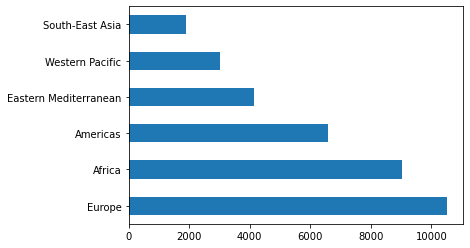

In [43]:
df2_plot = pd.read_csv("full_grouped.csv", parse_dates= ['Date'])
df2_plot['WHO Region'].value_counts().plot(kind='barh')

[Text(0.5, 1.0, 'COVID - 19 Cases from 2020-01-22 to 2020-07-27'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of COVID -19 Cases')]

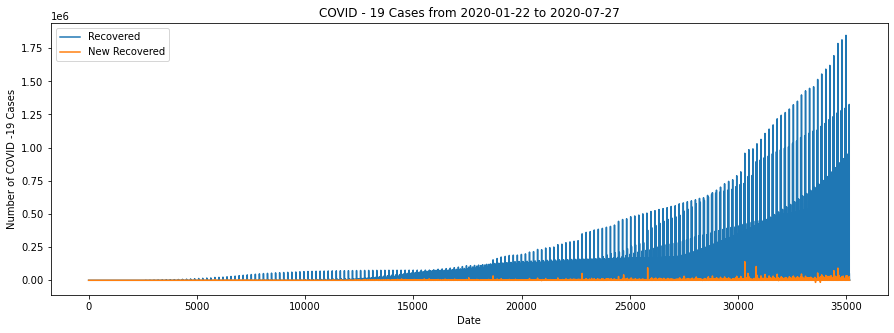

In [44]:
x = df2.index
y = df2['Recovered']
z = df2['New recovered']
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(x,y,z ,linewidth = 1.5)
ax.legend(['Recovered','New Recovered'])
ax.set(title = "COVID - 19 Cases from 2020-01-22 to 2020-07-27", xlabel = "Date", ylabel = "Number of COVID -19 Cases")


In [45]:
top_20 = total_df.groupby('Country/Region')['Recovered','Active'].sum().sort_values('Recovered' , ascending=False).reset_index().head(20)

C:\Users\RISHITHA\AppData\Local\Temp/ipykernel_15836/2806491543.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Country/Region'>

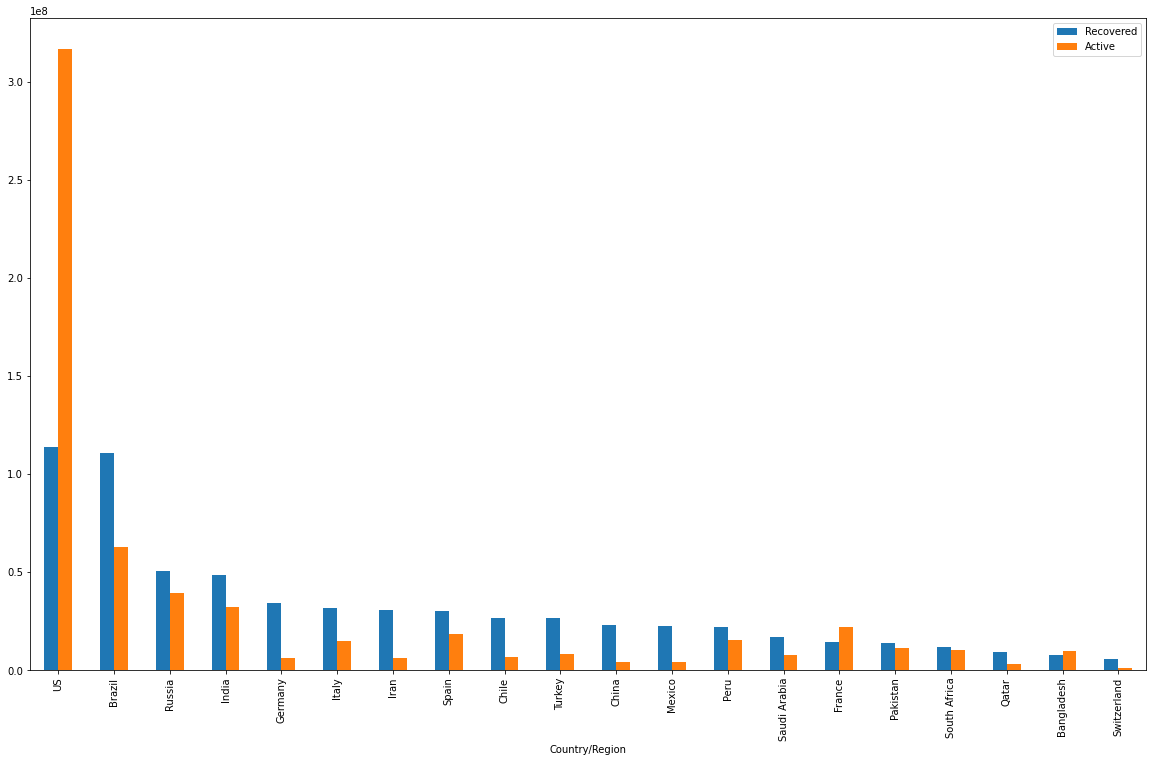

In [46]:
top_20.plot(x='Country/Region' , y = ['Recovered','Active'],
           kind = 'bar',figsize=(20,12))